<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/A7_Clustering_Airlines_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Part 2 - Airlines dataset**

# Performing clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
# Drawing the inferences from the clusters obtained.

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [ ]:
#import the eastwestairlines data
air=pd.read_csv('EastWestAirlines.csv')

In [ ]:
air.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [ ]:
al=air.drop(["ID#"],axis=1)

In [ ]:
al.shape

(3999, 11)

In [ ]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


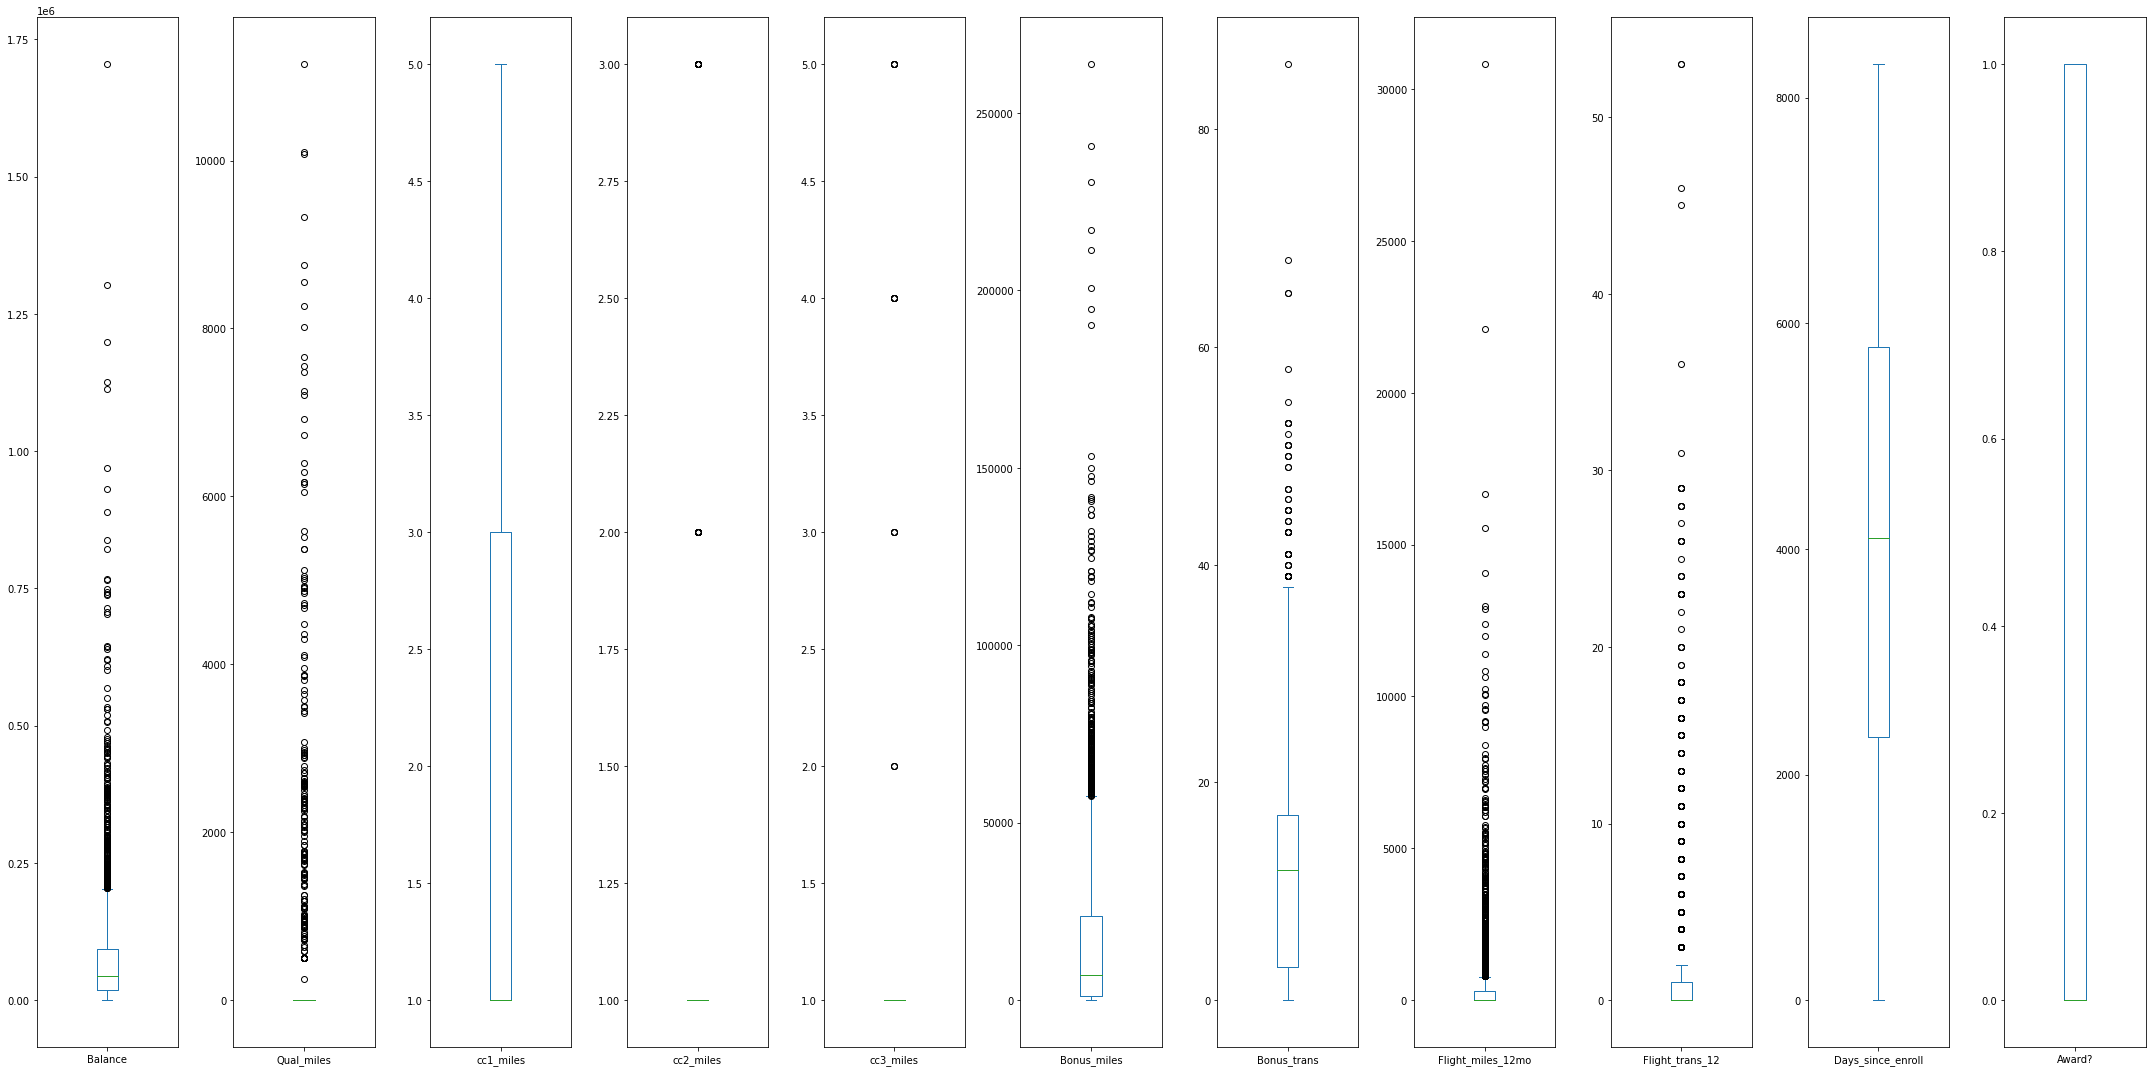

In [ ]:
al.plot(kind='box',subplots=True,figsize=(30,15))
plt.tight_layout()
plt.show()

# Normalization

In [ ]:
# Normalization function  maxmin scale
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame [ the columns are in diiferent scale and hence it is normalizd]
al_norm = norm_func(al.iloc[:,1:])

In [ ]:
al_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


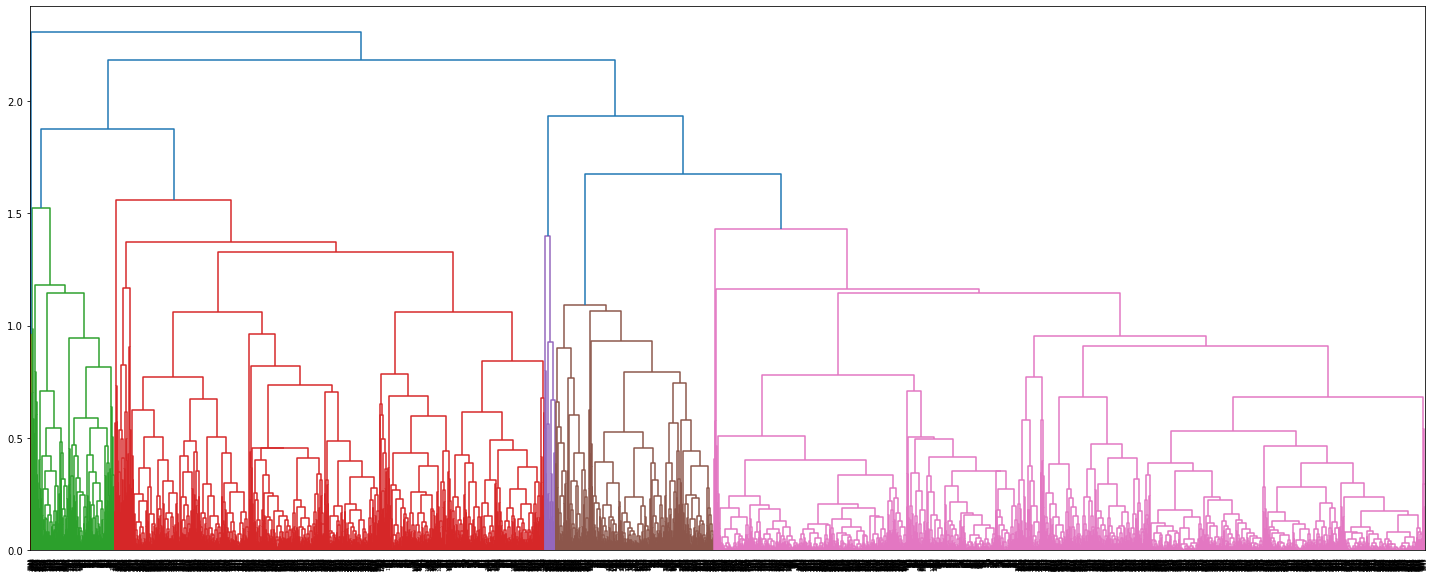

In [ ]:
# create dendrogram
plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(al_norm, method='complete'))
plt.show()
# here the method used for calculating the distance is complete,which is the farest neighbour

#Hierarchical clustering

In [ ]:
# creating of the clusters by agglomerative clustering
# he dist can be calculated in "euclidean","manhattan","cosine" distances

hcluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [ ]:
hcluster

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
h_al_norm=al_norm.copy()

In [ ]:
y_hc = hcluster.fit_predict(h_al_norm)

In [ ]:
h_al_norm['h_clusterid']=y_hc

In [ ]:
h_al_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusterid,h_clusterid
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2,2
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2,2
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2,2
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0,0


In [ ]:
h_al_norm['h_clusterid'].value_counts()

0    2493
2    1232
1     239
4      31
3       4
Name: h_clusterid, dtype: int64

In [ ]:
#copying a dataset for the hierarcgy model
h_al=al.copy()

In [ ]:
# adding the cluster to the data set
h_al['h_clusterid']=hcluster.labels_

In [ ]:
h_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
h_al_norm.groupby(["h_clusterid"]).agg(['mean']).reset_index()

,h_clusterid,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hclusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.007937,0.178099,0.000201,0.002206,0.038740,0.105771,0.007368,0.012321,0.460745,0.000000,0.0
1,1,0.019321,0.972803,0.000000,0.025105,0.307643,0.285784,0.040764,0.072788,0.660694,1.000000,1.0
2,2,0.021979,0.309456,0.004464,0.000609,0.070776,0.161092,0.023176,0.041120,0.538216,1.000000,2.0
3,3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000,3.0
4,4,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548,4.0


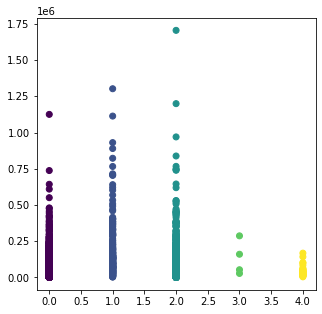

In [ ]:
# Ploting of the Clusters
plt.figure(figsize=(5, 5))
plt.scatter(h_al['h_clusterid'],h_al['Balance'], c=hcluster.labels_)
plt.show()

# K- means

In [ ]:
# using elbow method to find the optimum no of clusters
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

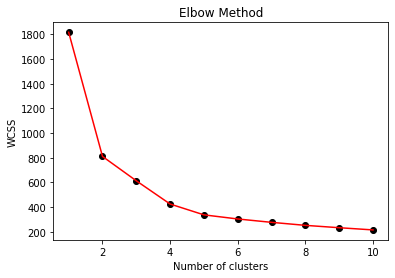

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(al_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='red')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this the optimum no of cluster is K=4,5

# Building the k-means clustering algorithm for k=4

In [ ]:
K4_al_norm=al_norm.copy()

In [ ]:
K4_cluster=KMeans(n_clusters=4)
K4_cluster.fit(K4_al_norm)

KMeans(n_clusters=4)

In [ ]:
K4_cluster.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
K4_al=al.copy()

In [ ]:
K4_al['K4_clusterid']=K4_cluster.labels_

In [ ]:
K4_al.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K4_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
K4_al.groupby(["K4_clusterid"])["Balance"].apply(lambda x : tuple(x))

K4_clusterid
0    (28143, 19244, 41354, 14776, 16420, 40091, 433...
1    (97752, 443003, 104860, 96522, 28495, 51890, 9...
2    (20856, 13958, 185681, 19221, 23193, 2176, 603...
3    (84914, 177926, 276571, 121260, 75971, 38077, ...
Name: Balance, dtype: object

In [ ]:
K4_al['K4_clusterid'].value_counts()

0    1897
1     808
2     673
3     621
Name: K4_clusterid, dtype: int64

In [ ]:
# Computing the centroids for K=4 clusters
K4_cluster.cluster_centers_

array([[ 8.28362120e-03,  2.31945177e-02,  8.96151819e-03,
         1.05429626e-03,  1.26482465e-02,  7.54496083e-02,
         7.35308092e-03,  1.24327389e-02,  4.36111859e-01,
         7.21644966e-16],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 6.55837114e-03,  6.44122383e-01,  8.05152979e-04,
         5.63607085e-03,  1.18636504e-01,  2.00595439e-01,
         7.31260853e-03,  1.19405706e-02,  5.34640411e-01,
        -2.77555756e-16]])

In [ ]:
# Group data by Clusters (K=4)
K4_al.groupby('K4_clusterid').agg(['mean']).reset_index()

,K4_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
1,1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


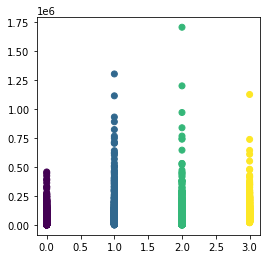

In [ ]:
# Plot Clusters
plt.figure(figsize=(4, 4))
plt.scatter(K4_al['K4_clusterid'],K4_al['Balance'], c=K4_cluster.labels_)
plt.show()

# Building the k-means clustering algorithm for k=5

In [ ]:
K5_cluster=KMeans(n_clusters=5)
K5_cluster.fit(al_norm)

KMeans(n_clusters=5)

In [ ]:
K5_cluster.labels_

array([4, 4, 4, ..., 0, 1, 1], dtype=int32)

In [ ]:
K5_al=al.copy()

In [ ]:
K5_al['K5_clusterid']=K5_cluster.labels_

In [ ]:
K5_al.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K5_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
K5_al.groupby(["K5_clusterid"])["Balance"].apply(lambda x : tuple(x))

K5_clusterid
0    (97752, 443003, 104860, 96522, 28495, 51890, 9...
1    (1625, 44665, 65021, 6341, 3641, 39207, 52046,...
2    (20856, 13958, 185681, 19221, 23193, 2176, 603...
3    (84914, 177926, 276571, 121260, 75971, 38077, ...
4    (28143, 19244, 41354, 14776, 16420, 40091, 433...
Name: Balance, dtype: object

In [ ]:
K5_al['K5_clusterid'].value_counts()

1    1032
4     868
0     808
2     673
3     618
Name: K5_clusterid, dtype: int64

In [ ]:
# Computing the centroids for K=4 clusters
K5_cluster.cluster_centers_

array([[ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 8.42749461e-03,  1.78916828e-02,  8.22050290e-03,
         1.69245648e-03,  1.23221802e-02,  7.19940623e-02,
         6.89356756e-03,  1.13681982e-02,  2.40390970e-01,
        -3.88578059e-16],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 6.59020789e-03,  6.46035599e-01,  8.09061489e-04,
         5.66343042e-03,  1.19022293e-01,  2.00383834e-01,
         7.27197078e-03,  1.18458814e-02,  5.32620376e-01,
        -3.33066907e-16],
       [ 8.08314088e-03,  3.03117783e-02,  9.81524249e-03,
         2.88683603e-04,  1.31294246e-02,  8.01600516e-02,
         7.93059768e-03,  1.37696632e-02,  6.71584567e-01,
         3.

In [ ]:
# Group data by Clusters (K=5)
K5_al.groupby('K5_clusterid').agg(['mean']).reset_index()

,K5_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


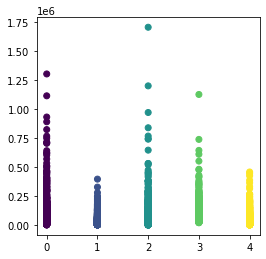

In [ ]:

# Plot Clusters
plt.figure(figsize=(4, 4))
plt.scatter(K5_al['K5_clusterid'],K5_al['Balance'], c=K5_cluster.labels_)
plt.show()

# DBSCAN

In [ ]:
db_al=al.copy()

In [ ]:
db_al_norm=al_norm.copy()

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=0.6,min_samples=5)
dbscan.fit(db_al_norm)

DBSCAN(eps=0.6)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# adding clusters to the dataset
db_al['db_clusterid']=dbscan.labels_
db_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
db_al.groupby('db_clusterid').agg(['mean']).reset_index()

,db_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,84273.000000,166.666667,1.000000,1.000000,2.333333,118908.000000,32.666667,10479.666667,18.666667,1460.666667,0.666667
1,0,59798.169249,87.637267,1.705602,1.013905,1.007151,10198.320620,9.143822,226.382201,0.652761,3821.751291,0.000000
2,1,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.000000


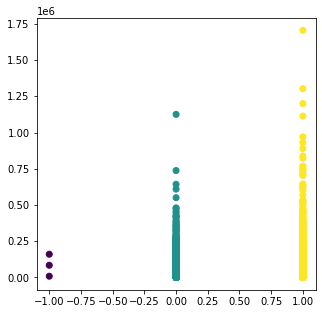

In [ ]:
# Plot Clusters
plt.figure(figsize=(5, 5))
plt.scatter(db_al['db_clusterid'],db_al['Balance'], c=dbscan.labels_)
plt.show()